# Importing Neccesary Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import calendar 

# Reading The Data from Uber 2016 dataset

In [47]:
df = pd.read_csv('My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [48]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Describing The Data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Cleaning the Data: removing null values

In [67]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [68]:
df = df.dropna()

# Correctly Formatting the start_date and end_date column to datetime 

In [171]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format="%m/%d/%Y %H:%M%S")
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format = "%m/%d/%Y %H:%M%S")

df['HOUR'] = [x.minute for x in df['START_DATE']]
#in the above statement i was challenged,(5:32pm on 30-May-2022 Muhammad wrote)
#I couldn't extract hours instead i took minutes that was passed to from the format and it works😂😂🤦‍♂️
#future Muhammad👀 please fix the above statement for acquiring hours

df['DAY'] = [x.day for x in df['START_DATE']]
df['MONTH'] = [x.month for x in df['START_DATE']]
df['WEEKDAY'] = [calendar.day_name[x.dayofweek] for x in df['START_DATE']]
df['DAY_OF_WEEK'] = [x.dayofweek for x in df['START_DATE']]

In [173]:
df.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,END_DATE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 00:21:11,2016-01-01 00:21:17,21,1,1,Friday,4
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 00:20:25,2016-01-02 00:20:38,20,2,1,Saturday,5
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 00:17:31,2016-01-05 00:17:45,17,5,1,Tuesday,1


# Plotting category column to see which type of people use uber the most

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

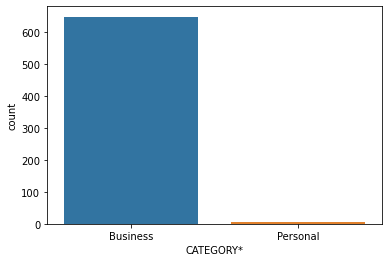

In [174]:
sns.countplot(x = 'CATEGORY*', data = df)

# Plotting purpose column to see why people use uber

<AxesSubplot:xlabel='count', ylabel='PURPOSE*'>

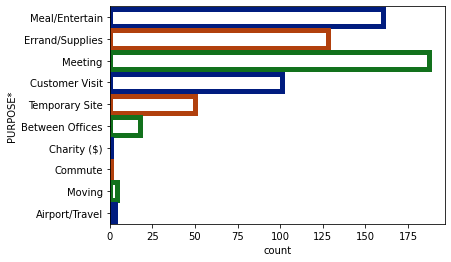

In [175]:
sns.countplot(y='PURPOSE*', data = df,
                  facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))


# Plotting Miles covered as a histogram

<AxesSubplot:>

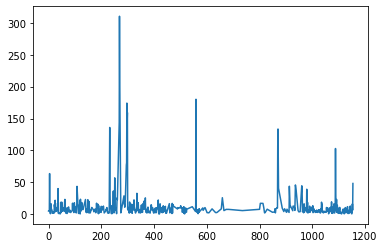

In [176]:
df['MILES*'].plot()

<AxesSubplot:ylabel='Frequency'>

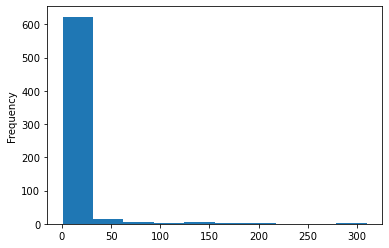

In [177]:
df['MILES*'].plot.hist()

# Visualizing what time of the day people ride Uber the most.

Text(0.5, 1.0, 'Number of trips vs hours')

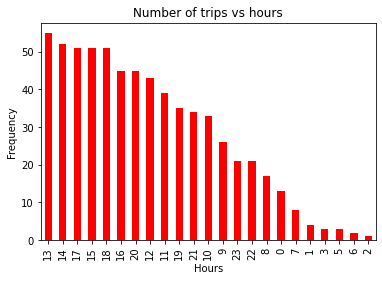

In [178]:
hours = df['HOUR'].value_counts()
hours.plot(kind='bar',color='red')
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Number of trips vs hours")

In [179]:
#It is very apparent here that the user travels during lunch hours and in the early evenings more than the rest of the day.
#It might be, so that client visits or client lunches occur more frequently between 1 PM-5 PM than the rest of the day.

# Visualizing the user's travel patterns on different days of the week

Text(0.5, 1.0, 'Days of the week Against the Frequency of UBER rides')

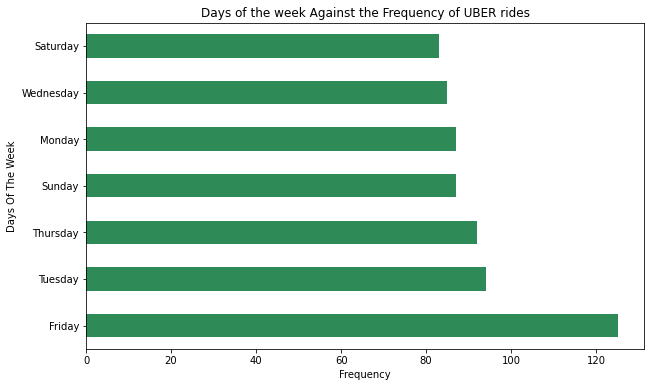

In [184]:
days = df['WEEKDAY'].value_counts()
days.plot(kind = 'barh', color = 'seagreen', figsize = (10,6))
plt.xlabel("Frequency")
plt.ylabel("Days Of The Week")
plt.title("Days of the week Against the Frequency of UBER rides")

# Finding which month in the calendar year the user uses UBER a lot 

<AxesSubplot:ylabel='Month Number in Year'>

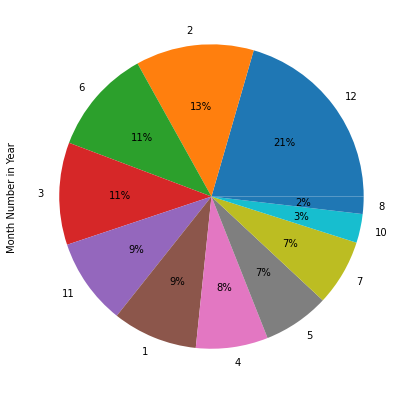

In [197]:
months = df['MONTH'].value_counts()

months.plot(kind = 'pie', ylabel = "Month Number in Year", autopct = "%1.0f%%",figsize=(12,7))

<AxesSubplot:title={'center':'Month of The Year Against Number of Rides'}, ylabel='Frequency'>

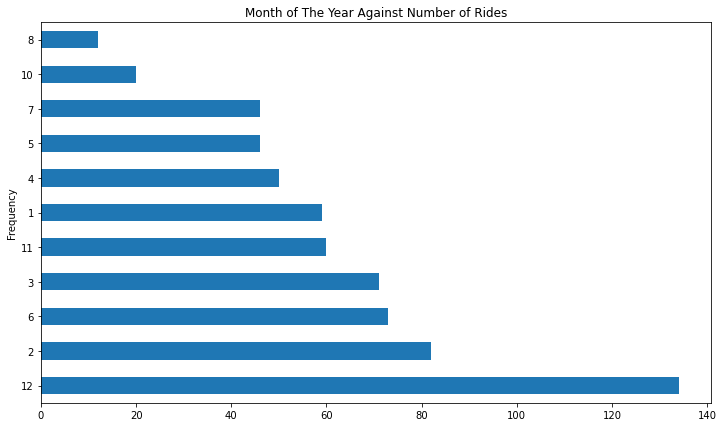

In [201]:
months = df['MONTH'].value_counts()

months.plot(kind = 'barh',xlabel = "Frequency",ylabel = "Month Number in Year",
            title ="Month of The Year Against Number of Rides",figsize=(12,7))

# Breaking down the 12th Month Further to see which day had the most rides

<AxesSubplot:title={'center':'Month of The Year Against Number of Rides'}, xlabel='Days in Month of December', ylabel='Frequency'>

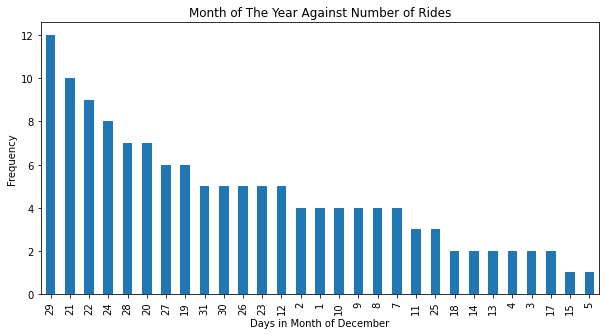

In [217]:
day_month = df['DAY'][df['MONTH'] == 12].value_counts()

day_month.plot(kind = 'bar',xlabel = "Days in Month of December",ylabel = "Frequency",
                     title ="Month of The Year Against Number of Rides",figsize=(10,5))

# Now visualizing Destinations and Pick Up points that many people prefer to travel to

<AxesSubplot:title={'center':'Start destination of Rides against its frequency'}, ylabel='frequency'>

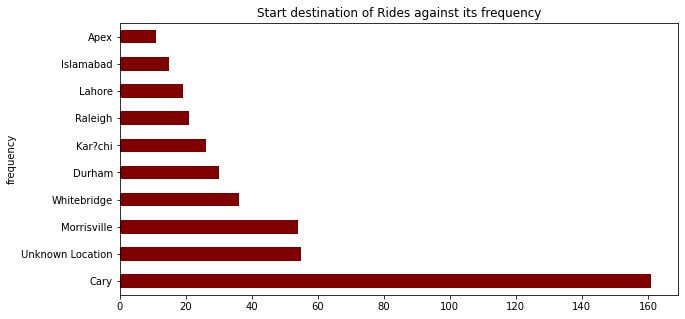

In [230]:
#i have used largest values from 10 loctions because if I remove .nlargest(),
#all the location records are plotted and the graph becomes broken
location = df['START*'].value_counts().nlargest(10)
location.plot(kind ='barh', color = 'maroon',xlabel = "frequency",ylabel = "Starting Desination",
                     title = "Starting destination of Rides against its frequency", figsize = (10,5))

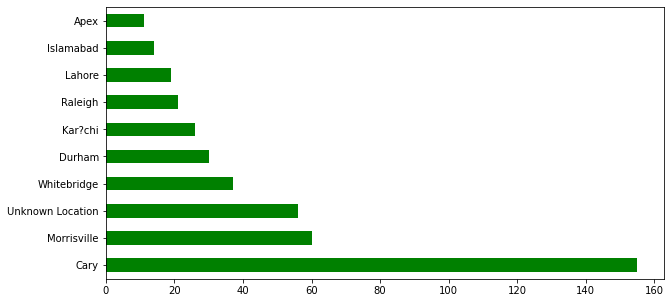

In [243]:
location = df['STOP*'].value_counts().nlargest(10)
location.plot(kind ='barh', color = 'green',figsize =(10,5))
plt.ylabel ="Final Desination" 
plt.xlabel = "Frequency"
plt.title = "Final destination of Rides against its frequency"

In [ ]:
#so Cary has the uses a lot of UBER rides since many people dont have cars in Cary 
# evident in starting destinations and inal destinations 

# CHALLENGE: Find highest number of start-end destinations from the Uber data

<AxesSubplot:>

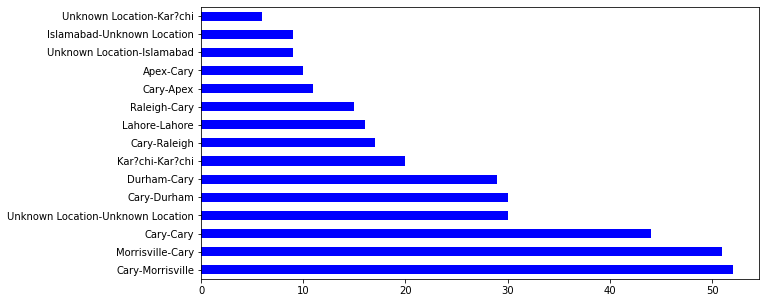

In [250]:
start_end = df['START*'].str.cat(df['STOP*'], sep ="-").value_counts().nlargest(15)
start_end.plot(kind ='barh', color = 'blue', figsize = (10,5))
#plt.xlabel('Frequency')
#plt.ylabel('Start - End Destination for UBER rides')
#plt.title('Start and End destinations against the frequency of occurence')